# 환경 및 데이터 가져오기 설정

### - 필요 패키지 설치 및 로드

#### >  패키지 설치
- jupyter notebook에서 설치 할 경우  =>  '!pip install packagename'
- Anaconda Prompt -> Command Prompt에서 설치 할 경우 => 
- 1)'pip install packagename'
- 2)'conda install -c conda-forge packagename'

In [1]:
#!pip install xgboost  
# 잘 설치가 안되는 경우 아래와 같이 실행
#import sys
#print(sys.base_prefix)
#!{sys.executable} -m pip install xgboost

#### > 사용할 패키지를 로드

In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from pylab import rcParams



ModuleNotFoundError: No module named 'pandas.plotting'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, roc_curve, auc

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from datetime import datetime

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection

#from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error, r2_score  #Computing r2_score


In [ ]:
# warning에 대한 표시  안함 설정
import warnings
warnings.filterwarnings('ignore')            

### - 환경설정

#### > 한글 폰트 설정 

In [ ]:
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

In [ ]:
# 사용가능한 TTF 폰트 목록 확인
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 처음 10개만 출력
font_list[:10]
# check 'Nanum' family font list 
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

font = {'family' : 'NanumGothic',
        'weight' : 'normal',
        'size'   : 8            
       }
mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', **font)

#plt.rcParams['axes.unicode_minus'] = False
#plt.rc('font', **font)

#### > 그래프 관련 설정

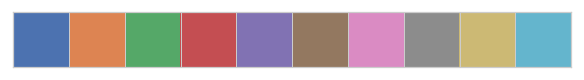

In [6]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

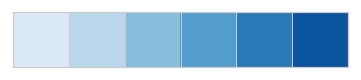

In [7]:
sns.palplot(sns.color_palette("Blues"))

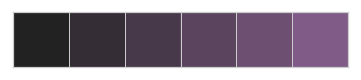

In [8]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

### - 데이터 읽어오기

In [9]:

datafilename = "data/oasis_longitudinal.csv"

existfile = os.path.isfile(datafilename)
if existfile :
    df = pd.read_csv(datafilename, header=0, encoding='utf-8')
else :
    print("파일 '{}'가 존재하지 않습니다. 확인 후 진행해주세요".format(datafilename))
    
# print the concise summery of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


# 데이터 이해하기

- Longitudinal MRI 데이터를 사용할 것입니다.
- 데이터 세트는 60 세에서 96 세 사이의 150 명의 피험자의 Longitudinal MRI 데이터로 구성됩니다.
- 각 피험자는 2 회 이상 방문하여 총 1 회의 총 373 회의 촬영 세션을 위해 1 년 이상 분리되었습니다
- 각 피험자는 적어도 한 번 스캔했습니다.
- 각 과목별로 단일 스캔 세션에서 얻은 3 ~ 4 개의 개별 T1 가중 MRI 스캔이 포함됩니다.
- 모두 오른 손잡이
- 연구 대상자 중 72 명은 'Nondemented'로 분류되었다.
- 대상자 중 64 명은 초기 방문시 'demented'로 분류되어 연구 전체에 걸쳐 그대로 유지되었습니다.
- 14 명의 피험자는 초기 방문 당시 'Nondemented'로 분류되어 나중에 방문했을 때 'Demented'로 특징 지어졌습니다. 이들은 'Converted'카테고리에 속합니다.

## - 변수의 의미 해석

#### Basic Info : 기본 정보
- Subject.ID : 피검자 ID
- MRI.ID     : MRI 번호
- Group      : (Converted / Demented / Nondemented) 
- Visit      : 방문회수
- MR.Delay   : ???

#### Demographics Info : 인구 통계 정보
- M.F   :  성별
- Hand  : 손잡이(모든 피검자는 오른 손잡이므로 열을 제거)
- Age   : 나이 
- EDUC  : 교육기간(년)
- SES   : 사회적 위치에 대한 Hollingshead Index에 의해 평가된 <<사회경제적 지위>> : 1(가장 높은 상태) ~ 5(가장 낮은 상태)로 분류 

#### Clinical Info  : 임상정보
- MMSE  : 간이정신상태검사 점수( 0 ~ 30) : 심한 (≤9 점), 중등도 (10-18 점), 경미한 (19-23 점) 인지 장애
- CDR   : 임상 치매 등급 (0 = 치매 없음, 0.5 = 매우 약한 AD, 1 = 경증 AD, 2 = 중등도 AD) 

#### Derived anatomic volumes : 유도된 해부학적 부피
- eTIV  : 추정된  총 두개 내 용적, mm3
- nWBV  : 자동화 된 조직 세분화 프로세스에 의해 회색 또는 흰색 물질로 분류 된 아틀라스 마스크 이미지의 모든 보셀의 백분율로 표현 된 표준화 된 전체 뇌량 
- ASF   : 아틀라스 스케일링 계수 (단위 없음). 네이티브 - 공간 뇌 및 두개골을 아틀라스 타겟으로 변환시키는 계산 된 스케일링 계수(즉 변환 매트릭스의 결정자) 

### > 변수에 대한 상세 설명

#### - Mini–Mental State Examination (MMSE) : 간이 정신 상태 검사
Mini-Mental State Examination (MMSE) 또는 Folstein 검사는인지 장애를 측정하기 위해 임상 및 연구 환경에서 광범위하게 사용되는 30 가지 질문지입니다. 그것은 일반적으로 치매에 대한 심사를 위해 의학 및 연합군의 건강에 사용됩니다. 또한인지 장애의 심각성과 진행 정도를 평가하고 시간 경과에 따른 개인의인지 적 변화 과정을 추적하는데도 사용됩니다. 따라서 치료에 대한 개인의 반응을 문서화하는 효과적인 방법이됩니다. MMSE의 목적은 그 자체로 어떤 특정한 기관 적 실체에 대한 진단을 제공하지 못했다.

- 점수에 대한 설명

24 점 이상인 점수 (30 점 만점)는 정상인지를 나타냅니다. 이 점수 이하에서는 심한 (≤9 점), 중등도 (10-18 점) 또는 경미한 (19-23 점)인지 장애를 나타낼 수 있습니다. 원시 점수는 또한 교육 성취도 및 연령에 맞게 수정해야 할 수도 있습니다. 즉, 30 점의 최대 점수는 치매를 배제 할 수 없습니다. 낮은 정신 장애가 MMSE 검사에서 비정상적인 결과를 초래할 수도 있지만, 낮은 점수에서 매우 낮은 점수는 치매의 존재와 밀접한 상관 관계가 있습니다. 순전히 신체적 인 문제의 존재는 또한 올바르게 지적되지 않으면 해석을 방해 할 수 있습니다. 예를 들어 환자가 신체적으로 지시를 듣거나 읽을 수 없거나 작문 및 그림 기술에 영향을 미치는 운동 부족이있을 수 있습니다.

#### - Clinical Dementia Rating (CDR): 임상 치매 등급
CDR ™은 기억, 오리엔테이션, 판단 및 문제 해결, 지역 사회 문제, 가정 및 취미, 개인 위생과 같은 치매 및 관련 치매에 적용 할 수 있는 인지 기능의 여섯 가지 영역을 특성화하는 데 사용되는 5 점 척도입니다. 각 등급을 매기는 데 필요한 정보는 환자의 반 구조적 인터뷰와 CDR ™ 평가 프로토콜이라고하는 신뢰할 수있는 정보 제공자 또는 부수적 인 출처 (예 : 가족 구성원)를 통해 얻어집니다.

CDR ™ Scoring Table은 임상의가 인터뷰 데이터와 임상 적 판단에 근거하여 적절한 등급을 책정하는 데 도움이되는 설명 앵커를 제공합니다. 각 도메인에 대한 평점 외에도 전체 CDR ™ 점수는 CDR ™ 채점 알고리즘을 사용하여 계산할 수 있습니다. 이 점수는 환자의 장애 / 치매 수준을 특성화하고 추적하는 데 유용합니다.

0 = 보통 <br>
0.5 = 매우 약한 치매 <br>
1 = 경증 치매 <br>
2 = 중등도 치매 <br>
3 = 중증 치매 <br>


#### - Estimated total intracranial volume (eTIV) : 추정된  총 두개 내 용적
때로는 총 두개 내 용적 (TIV)으로 지칭되는 ICV 측정은 경막이 명확하게 검출되지 않을 때 상완 내 경질 물질 또는 대뇌 윤곽에 의해 설명 된대로 두개골의 예상 용적을 의미합니다. ICV는 자성 공명 (MR), MR 및 확산 텐서 이미징 (DTI), MR 및 단일 광자 방출 계산 된 단층 촬영 (SPECT), 초음파 및 계산 된 CT와 같은 다양한 이미징 양식에서 대뇌 구조 분석과 관련된 연구에 자주 사용됩니다. 단층 촬영 (CT). 노화 동안의 ICV 일관성은 뇌의 형태 학적 특징에 의존하는 연구에서 피험자 전체의 머리 크기 변형을 보정하는 데 신뢰할 수있는 도구입니다. ICV와 연령 및 성별은 알츠하이머 병, 노화 및인지 장애와 같은 진행성 신경 퇴행성 뇌 질환을 조사 할 때 회귀 분석을 조정하기위한 공변량으로보고됩니다. 또한 ICV는 premorbid brai의 구조와 관련된 노화 관련 변화를 평가하고 경증인지 기능 장애 (MCI) 및 알츠하이머 병 (AD) 환자의 위축 패턴을 결정하기 위해 독립적 인 복셀 기반 형태 계측 기능으로 활용되어 정신 분열증, 간질 및 게이지 인식 효능에서의 백색 물질 (WM).


# Exploratory Data Analysis(EDA) : 탐색적 데이터 분석

## Descriptive statistics
데이터의 형태, 변수 별 type 및 기술통계량을 뽑는 방법

#### - Check dimensions of data

In [10]:
# 관찰숫자 및 변수 갯수 확인
print("Total Rows and Columns (Rows,Columns) : ",df.shape)
# print first five rows of the dataset
df.head(5)

Total Rows and Columns (Rows,Columns) :  (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


#### - Check data type for each variable

In [11]:
print(df.dtypes)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


#### - Calculate decriptive statistics.
-   주요 변수 설명 통계 : NaN 값을 제외하고 데이터 집합의 분포의 중심 경향, 분산 및 모양을 요약하는 설명 통계를 생성.

In [12]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


#### - Check class distribution : 분류 항목의 분포를 확인한다.
- 현재 데이터는 치매여부를  분류(Classification)하는 문제와 관련이 있다
- 이런 경우는 각 클래스별로 데이터 포인트(변수)가 몇 개식 들어가 있는지를 파악하는 것이 중요하다

In [13]:
cdr_count = df.groupby('Group').size()
print(cdr_count)

Group
Converted       37
Demented       146
Nondemented    190
dtype: int64


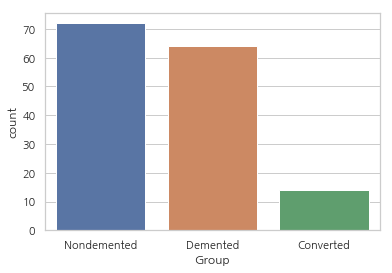

In [14]:
# 치매여부에 대한 분포를 확인
# 한 사람이 2회이상 방문했기 때문에 한 번 방문한 데이타를 취해서 분포를 확인
#sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

## 데이터 전처리

### - 결측치 확인 및 변경

In [15]:
#  결측치 확인
#df.isna().sum()
print("결측치가 있는 변수 및 갯수" )
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

결측치가 있는 변수 및 갯수
SES has 19 null values
MMSE has 2 null values


In [16]:
# SES 결측치 채우기 : 성별, 나이기준으로 median 
med_ses_1 = df[ (df['M/F']=='M') & (df['Age' ]>=70) & (df['Age' ]<80) ]['SES'].median()
print(med_ses_1)
med_ses_2 = df[ (df['M/F']=='M') & (df['Age' ]>=80) & (df['Age' ]<90) ]['SES'].median()
print(med_ses_2)
med_ses_3 = df[ (df['M/F']=='F') & (df['Age' ]>=70) & (df['Age' ]<80) ]['SES'].median()
print(med_ses_3)
med_ses_4 = df[ (df['M/F']=='F') & (df['Age' ]>=80) & (df['Age' ]<90) ]['SES'].median()
print(med_ses_4)

df.loc[ (( df['SES'].isnull()) &  (df['M/F'] == 'M') & (df['Age' ] >= 70) & (df['Age' ] < 80) ),'SES']  = med_ses_1
df.loc[ (( df['SES'].isnull()) &  (df['M/F'] == 'M') & (df['Age' ] >= 80) & (df['Age' ] < 90) ),'SES']  = med_ses_2
df.loc[ (( df['SES'].isnull()) &  (df['M/F'] == 'F') & (df['Age' ] >= 70) & (df['Age' ] < 80) ),'SES']  = med_ses_3
df.loc[ (( df['SES'].isnull() )&  (df['M/F'] == 'F') & (df['Age'  ]>= 80) & (df['Age' ] < 90) ),'SES']  = med_ses_4

2.0
3.0
3.0
2.0


In [17]:
# MMSE 결측치 채우기 : 성별, 나이기준으로 median 
med_mmse = df[ (df['M/F']=='F') & (df['Age' ]>=70) & (df['Age' ]<80) ]['MMSE'].median()
print(med_mmse)
df.loc[ df['MMSE'].isnull(),'MMSE'] = med_mmse

29.0


In [18]:
# 정상적으로 업데이트가 잘 됐는지 결측치가 있는 변수 확인
df[column].isnull().any()

False

### - 타겟 그룹 변경

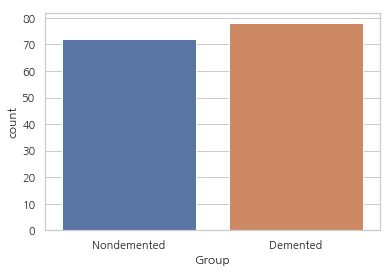

In [19]:
# 세 그룹을 가지고 있으므로 2개의 그룹으로 변경하기 위해 'Converted'를 'Demented'로 변경
ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

### - 주요 변수 확인

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5,1,'Gender and Demented rate')

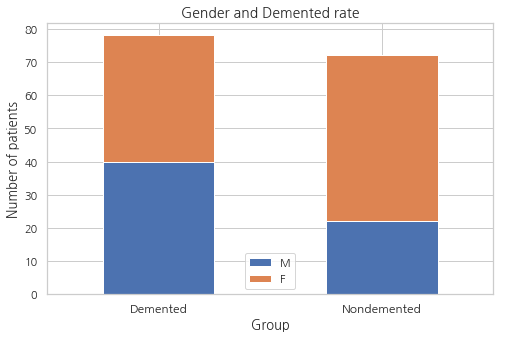

In [20]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

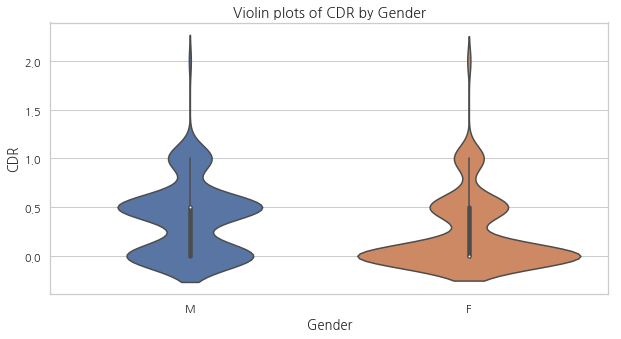

In [21]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

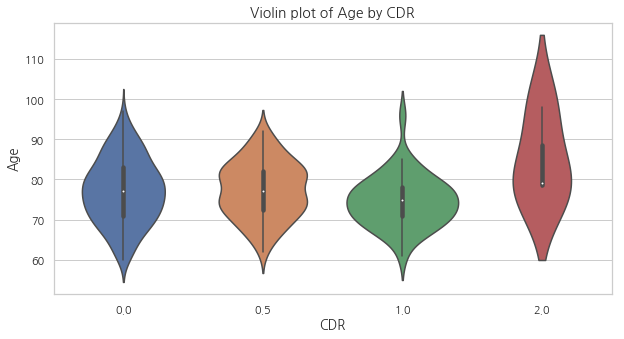

In [22]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

In [23]:
# find the outliers in each of the column
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369]),)
EDUC :  (array([107, 108, 109]),)
SES :  (array([136, 137, 138, 161, 162, 179, 180]),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366]),)
eTIV :  (array([0, 1]),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282]),)


### > convert the character data into numeric

#### - Correlations between variables : 변수들간의 상관관계를 파악한다

#### >> categorical 변수를 numeric 변수로 변경

In [24]:
# convert the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

##### >> Pearson's correlation coefficient를 계산(-1이상, 1이하)

In [25]:
correlations = df.corr(method = 'pearson')
print(correlations)

             Group     Visit  MR Delay       M/F       Age      EDUC  \
Group     1.000000 -0.095507 -0.120638  0.222146 -0.005941 -0.193060   
Visit    -0.095507  1.000000  0.920009  0.069791  0.183213  0.024615   
MR Delay -0.120638  0.920009  1.000000  0.048006  0.205357  0.051630   
M/F       0.222146  0.069791  0.048006  1.000000 -0.037726  0.089279   
Age      -0.005941  0.183213  0.205357 -0.037726  1.000000 -0.027886   
EDUC     -0.193060  0.024615  0.051630  0.089279 -0.027886  1.000000   
SES       0.053627 -0.047401 -0.024169 -0.056158 -0.046037 -0.703847   
MMSE     -0.520553 -0.027381  0.066619 -0.168530  0.055255  0.192158   
CDR       0.778049  0.002325 -0.062915  0.202140 -0.026257 -0.153121   
eTIV     -0.042700  0.117428  0.119624  0.572549  0.042348  0.257015   
nWBV     -0.311346 -0.126682 -0.105586 -0.249618 -0.518359 -0.012200   
ASF       0.032495 -0.120399 -0.123545 -0.561647 -0.035067 -0.241752   

               SES      MMSE       CDR      eTIV      nWBV     

### - Skew of univariate distributions : 단변량 분포의 왜곡을 확인
- 각 변수 별 skewness(왜도, 비대칭도)를 계산
- 몇 모델은 변수가 Gaussian distribution임을 가정하고 있음. (예. Linear regression)
- 각 변수가 얼마나 치우쳐진 분포를 가졌는지 확인하는 것은 매우 중요
- Gaussian distribution처럼 평균을 중심으로 좌,우 대칭인 경우 skewness = 0
- 평균이 중앙값(median)보다 크면 (즉, 왼쪽으로 길게 늘어진 형태) skewness < 0
- 평균이 중앙값(median)보다 작으면 (즉, 오른쪽으로 길게 늘어진 형태) skewness > 0

In [26]:
skew = df.skew()
print(skew)

Group       0.037692
Visit       1.041023
MR Delay    0.945037
M/F         0.288256
Age         0.141700
EDUC       -0.025977
SES         0.243369
MMSE       -2.375332
CDR         1.319318
eTIV        0.496881
nWBV        0.234587
ASF         0.083450
dtype: float64


## Visualization : 시각화
각종 시각화 방법을 통해 직관적으로 데이터를 이해

#### - pair plot

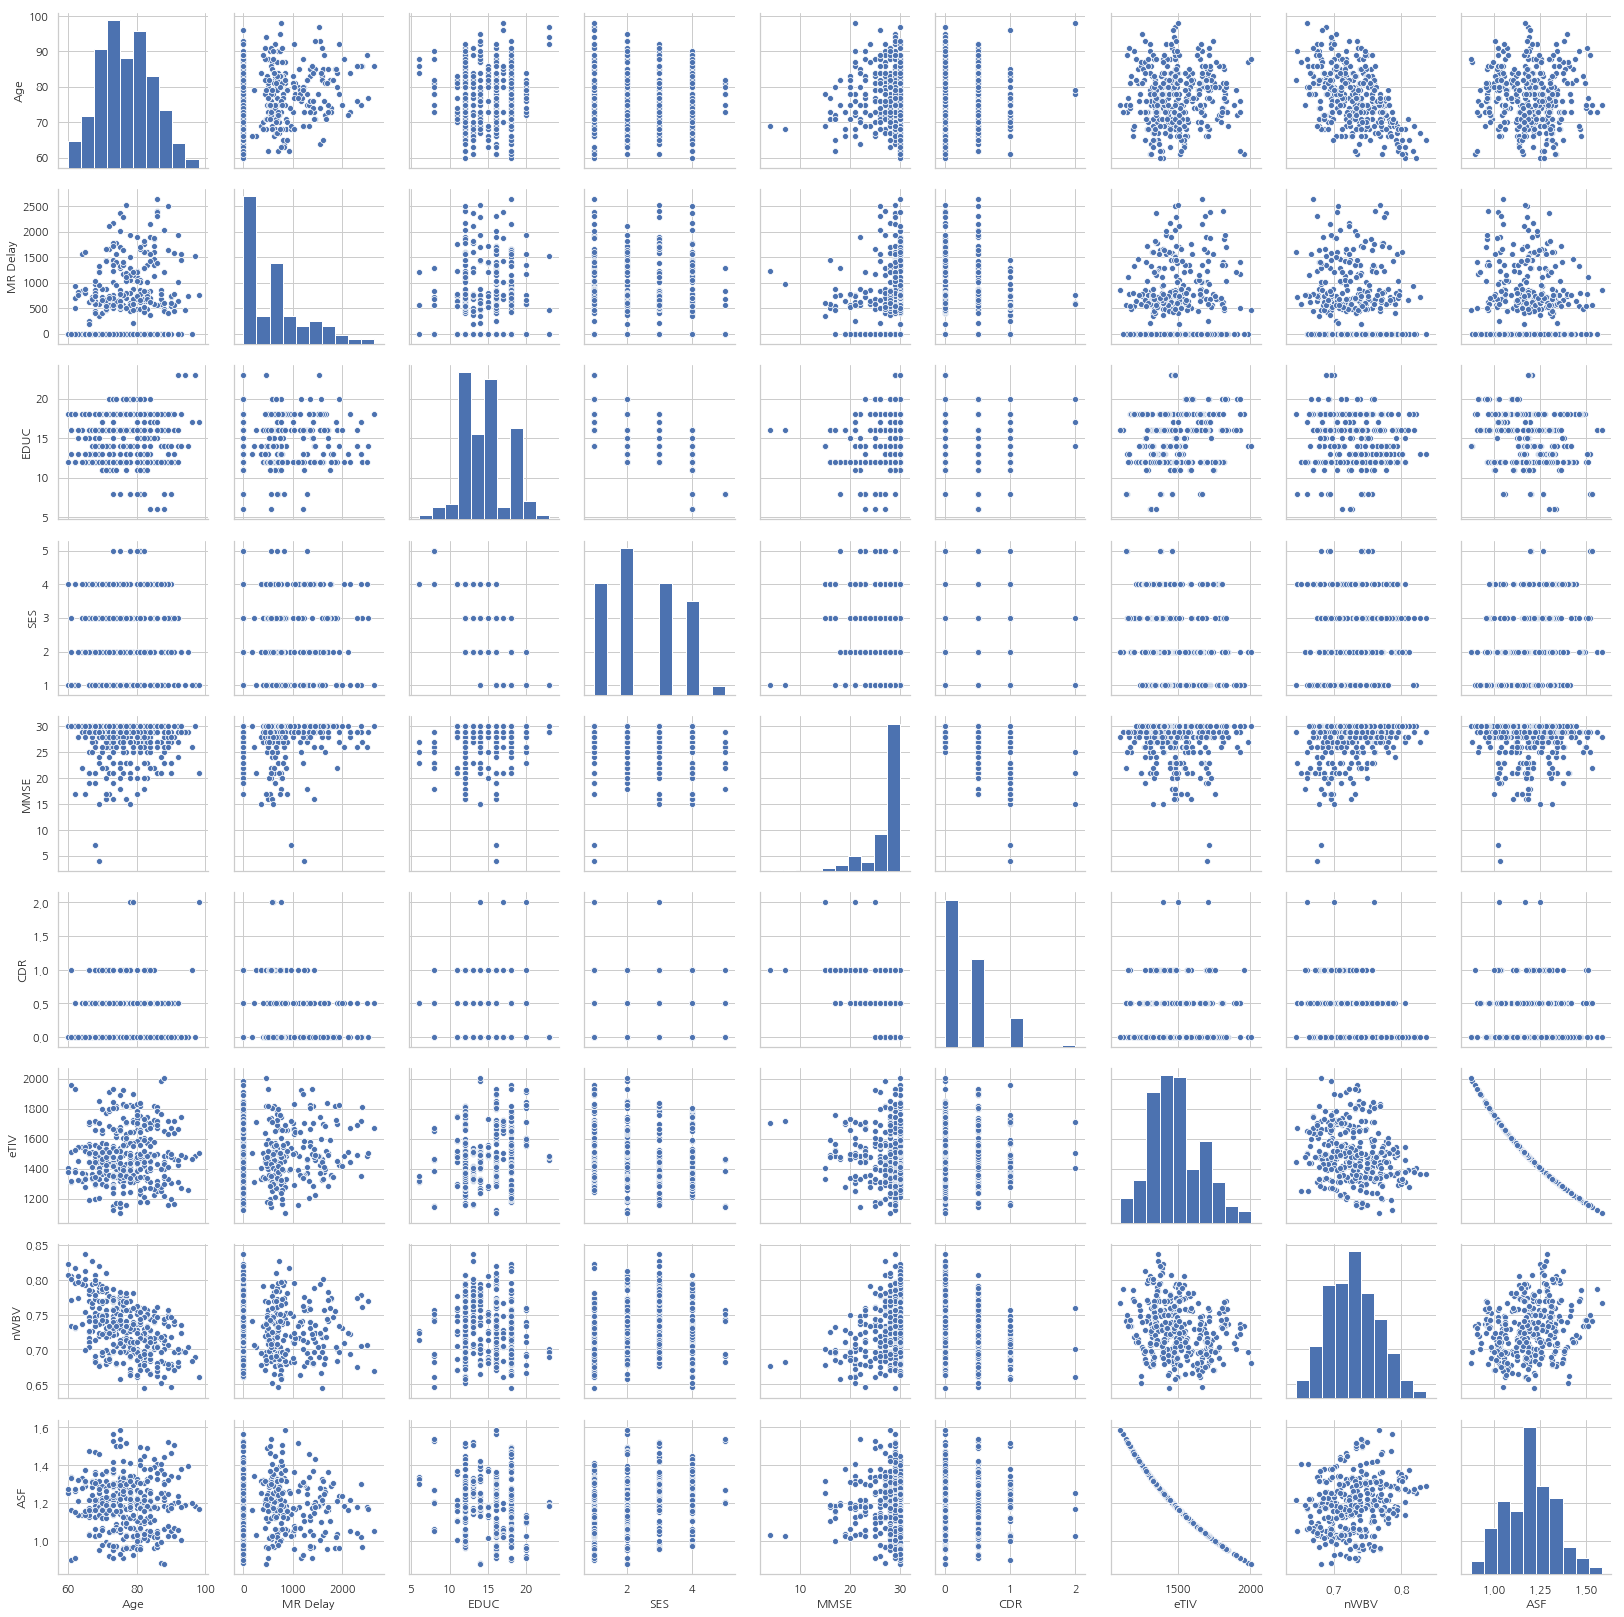

In [27]:
rcParams['figure.figsize'] = 8,5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=df
sns_plot = sns.pairplot(x[cols])

#### - Histogram

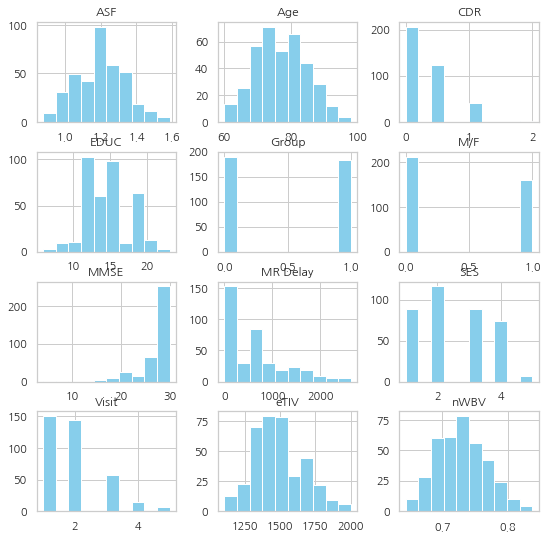

In [28]:
df.hist(figsize=(9,9), color='skyblue')
plt.show()

#### - Box-plot

[Text(0.5,0,'ASF')]

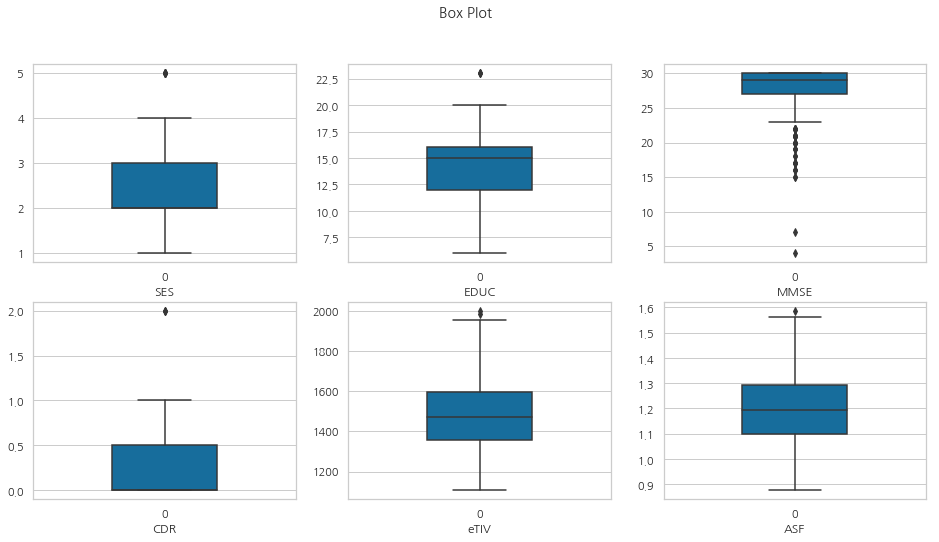

In [29]:
# boxplots which shows the IQR(Interquartile Range )
fig, axes = plt.subplots(2,3,figsize = (16,8))
fig.suptitle("Box Plot",fontsize=14)
#sns.set_style("whitegrid")
sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]).set( xlabel='SES')
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]).set( xlabel='EDUC')
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]).set( xlabel='MMSE')
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]).set( xlabel='CDR')
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]).set( xlabel='eTIV')
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]).set( xlabel='ASF')

#### - Correlation matrix plot

In [30]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

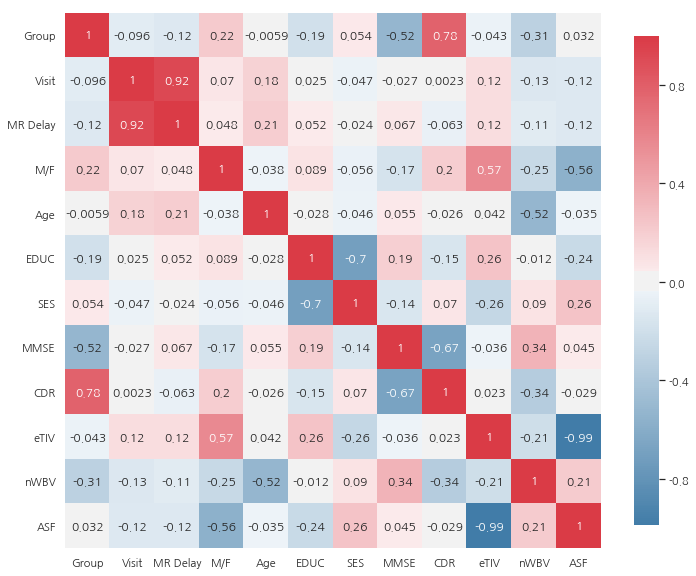

In [31]:
plot_correlation_map(df)

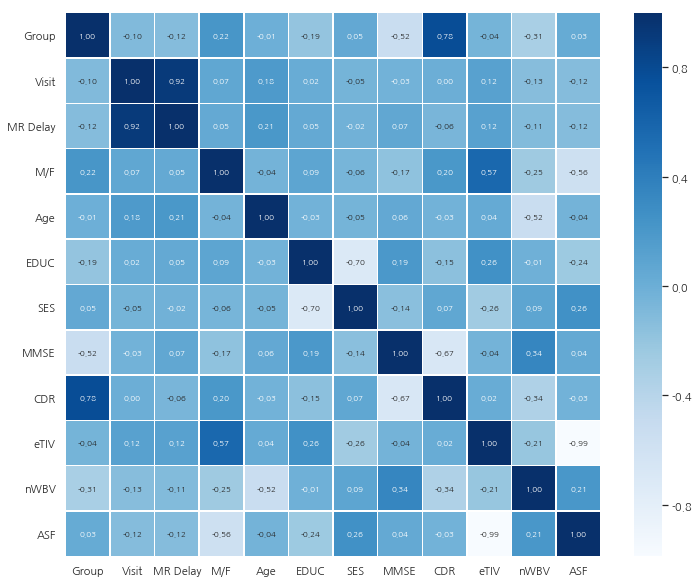

In [32]:
# 상관 관계도 분석 : heatmap
df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

#### - Scatter plot matrix

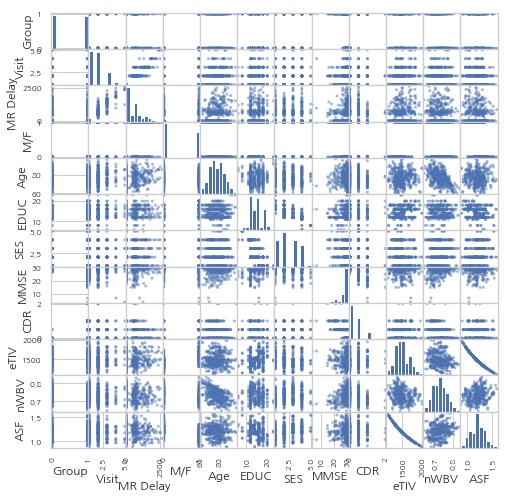

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (8, 8)) 
plt.show()

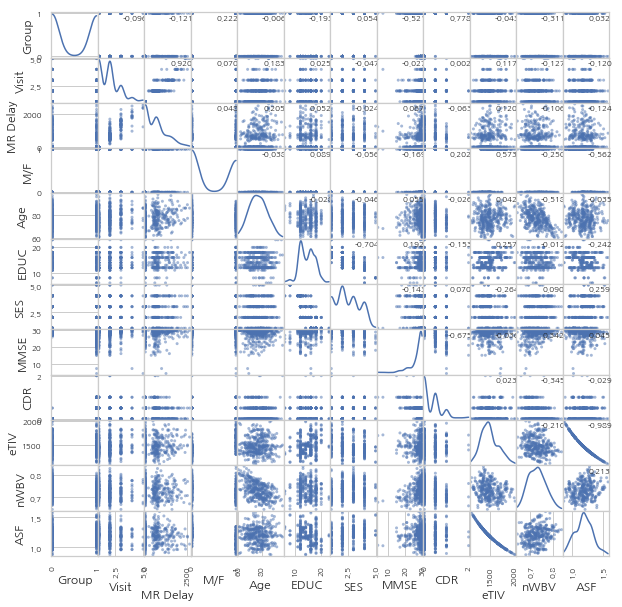

In [34]:
axes = scatter_matrix(df, alpha=0.5, diagonal='kde', figsize = (10, 10))
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.9), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [36]:
plt.np.triu_indices_from(axes, k=1)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
         3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
         6,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  9,  9, 10]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,
         8,  9, 10, 11,  3,  4,  5,  6,  7,  8,  9, 10, 11,  4,  5,  6,  7,
         8,  9, 10, 11,  5,  6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11,
         7,  8,  9, 10, 11,  8,  9, 10, 11,  9, 10, 11, 10, 11, 11]))

In [37]:
# attribute 중에 ojbect type check
objAttr = []
for col in df.columns.values:
    if df[col].dtype == 'object':
        objAttr.append(col)
        print(col)

Subject ID
MRI ID
Hand


#### - Seaborn을 사용한 데이터 분포 시각화

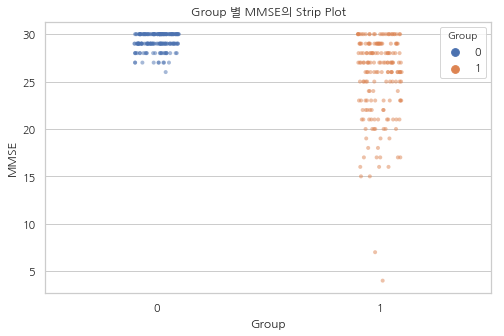

In [44]:
np.random.seed(0)
sns.stripplot(x="Group", y="MMSE", hue='Group', size = 4, alpha=0.5, data=df, jitter=True)
plt.title("Group 별 MMSE의 Strip Plot")
plt.show()

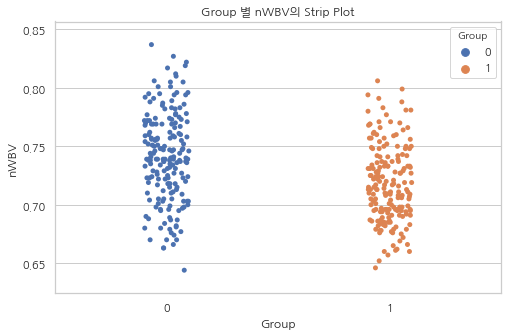

In [45]:
np.random.seed(0)
sns.stripplot(x="Group", y="nWBV", hue='Group', data=df, jitter=True)
plt.title("Group 별 nWBV의 Strip Plot")
plt.show()

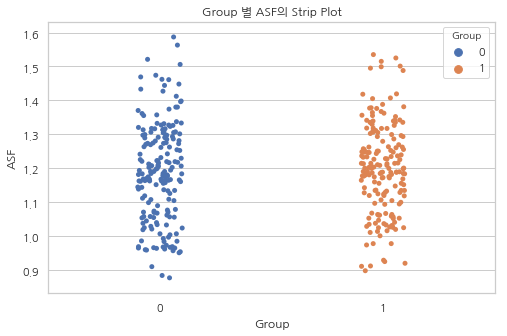

In [46]:
np.random.seed(0)
sns.stripplot(x="Group", y="ASF", hue='Group', data=df, jitter=True)
plt.title("Group 별 ASF의 Strip Plot")
plt.show()

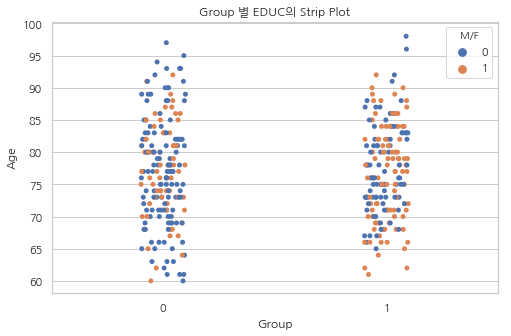

In [47]:
np.random.seed(0)
sns.stripplot(x="Group", y="Age", hue='M/F', data=df, jitter=True)
plt.title("Group 별 EDUC의 Strip Plot")
plt.show()

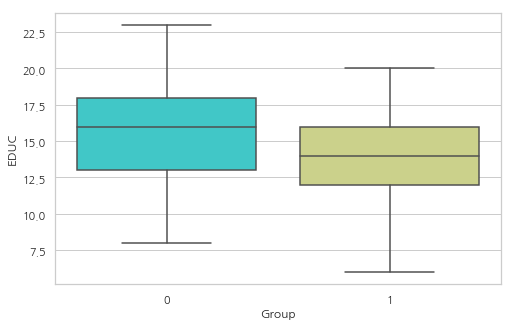

In [48]:
sns.boxplot(x='Group', y='EDUC', data=df, palette='rainbow')

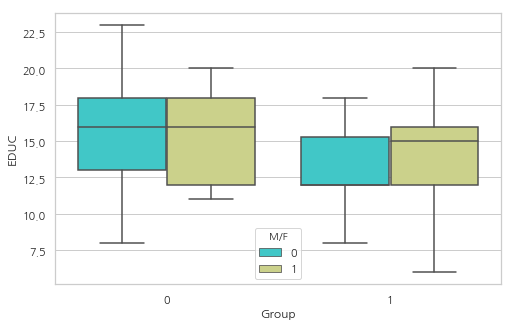

In [49]:
sns.boxplot(x='Group', y='EDUC', hue='M/F', data=df, palette='rainbow')
#nv_rank_mapping = {v: k for k, v in rank_mapping.items()}
#df['그룹'] = df['그룹'].map(inv_rank_mapping)
#df

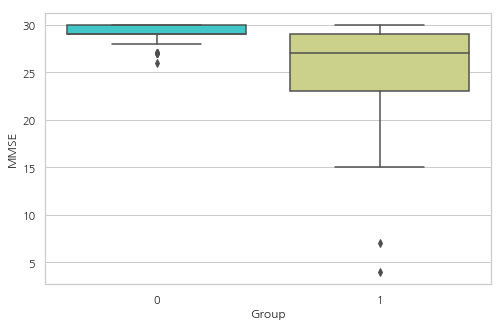

In [50]:
sns.boxplot(x='Group', y='MMSE', data=df, palette='rainbow')

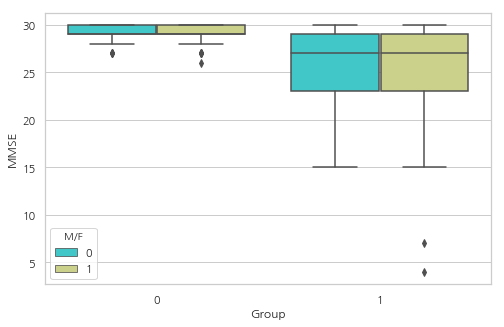

In [51]:
sns.boxplot(x='Group', y='MMSE', hue='M/F', data=df, palette='rainbow')

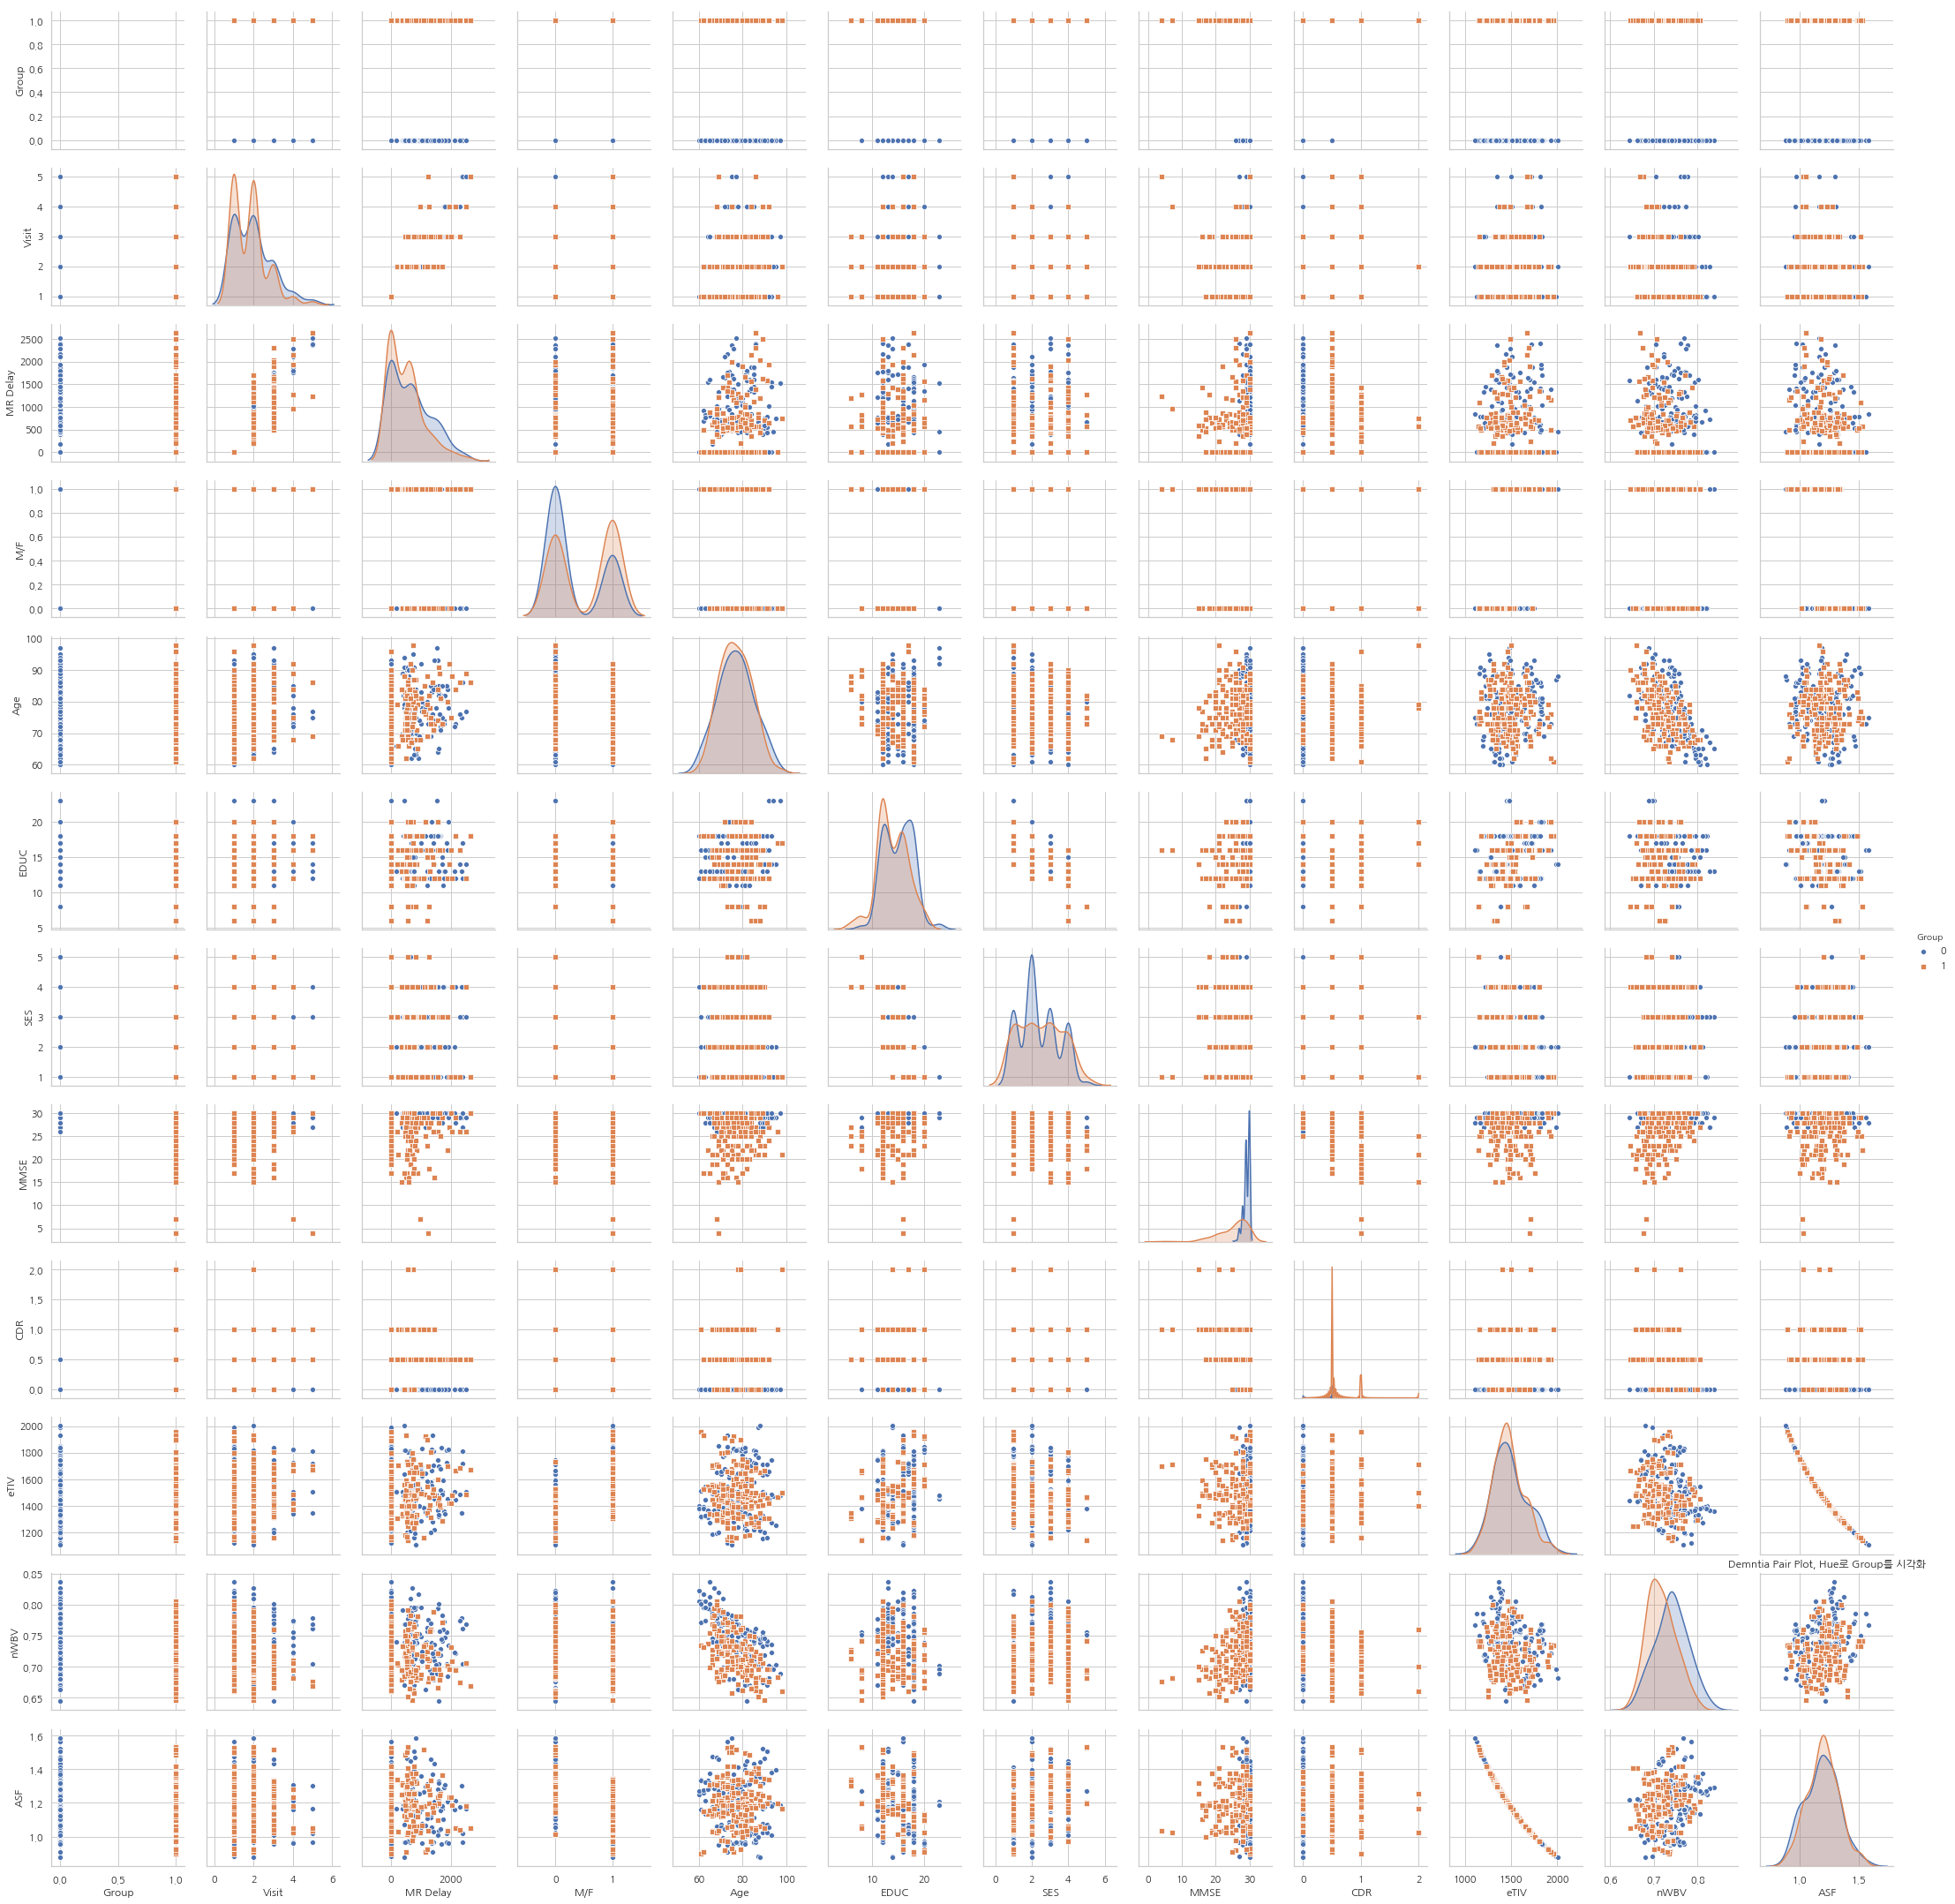

In [52]:
sns.pairplot(df, hue="Group", markers=["o", "s"])
plt.title("Demntia Pair Plot, Hue로 Group를 시각화")
plt.show()

In [53]:
demetia_size = df.pivot_table(
    index="Group", columns="M/F", aggfunc="size")
demetia_size

M/F,0,1
Group,,
0,129,61
1,84,99


In [54]:
demetia_size = df.pivot_table(
    index="Group", columns="M/F", aggfunc="size")
demetia_size

M/F,0,1
Group,,
0,129,61
1,84,99


### - Encode variables into numeric
- 대부분의 알고리즘 (또는 ML 라이브러리)은 숫자 변수로 더 나은 결과를 산출합니다. 
- 파이썬에서 라이브러리 "sklearn"은 숫자 배열의 기능을 필요로합니다.

### - 범주형 변수를 다루는 입증 된 방법
- 번호로 변환(레이블인코더, 숫자상자를 숫자로 변환)
- 수준결합(레벨 결합, 빈도 또는 응답속도 사용)
- 더미 코딩( 레벨이 많은 경우는 먼저 결합 방법을 사용하여 레벨을 줄인 다음 더미 코딩을 사용, One Hot Encoding)

In [55]:
# 레이블 인코더 : Encode columns into numeric 
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
print(df.head())
print(df.dtypes)

   Subject ID  MRI ID  Group  Visit  MR Delay  M/F  Hand  Age  EDUC  SES  \
0           0       0      0      0         0    1     0   27     5    1   
1           0       1      0      1        15    1     0   28     5    1   
2           1       2      1      0         0    1     0   15     3    1   
3           1       3      1      1        32    1     0   16     3    1   
4           1       4      1      2       185    1     0   20     3    2   

   MMSE  CDR  eTIV  nWBV  ASF  
0    14    0   284    35    1  
1    17    0   285    20    0  
2    10    1   231    73   52  
3    15    1   254    51   32  
4     9    1   238    40   46  
Subject ID    int64
MRI ID        int64
Group         int64
Visit         int64
MR Delay      int64
M/F           int64
Hand          int64
Age           int64
EDUC          int64
SES           int64
MMSE          int64
CDR           int64
eTIV          int64
nWBV          int64
ASF           int64
dtype: object


### - 전처리된 중간 데이터 저장 

In [56]:
processed_datafilename = "data/oasis_longitudinal_processed.csv"
df.to_csv(processed_datafilename, index=False)

# 데이타 준비 및 분할

### - 다시 실행할 때 전처리 후 저장된 데이터를 읽어서 이 부분부터 진행

In [57]:
processed_datafilename = "data/oasis_longitudinal_processed.csv"
df = pd.read_csv(processed_datafilename, header=0, encoding='utf-8')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,0,0,1,0,27,5,1,14,0,284,35,1
1,0,1,0,1,15,1,0,28,5,1,17,0,285,20,0
2,1,2,1,0,0,1,0,15,3,1,10,1,231,73,52
3,1,3,1,1,32,1,0,16,3,1,15,1,254,51,32
4,1,4,1,2,185,1,0,20,3,2,9,1,238,40,46


### - 모델 훈련을 위한 공식 : 변수 선택
 - Group ~ M.F + Age + EDUC + SES + MMSE + eTIV + nWBV
 - ASF와 eTIV는 선형 의존성이기 때문에 Atlas Scaling Factor를 떨어 뜨리므로 multicollinearity(다중공선성)이 발생합니다
 - CDR(임상 치매 등급) 자체가 치매등급이므로제외 - 결과로서 업데이트 되는 변수이므로
 - HAND는 모두 오른손잡이 이므로 제외
 - Subject ID, MRI ID, Visit는 단순 일련번호 또는 회수 이므로 제외
 - MR Delay ???

In [58]:
# 모델링을 위한 변수 선택
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values


### - train, test set 분리

In [59]:
# train, test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("total count : {}, df_train count : {}, df_test count : {}".format(len(df), len(X_train), len(X_test)))


total count : 373, df_train count : 261, df_test count : 112


# 모델 적합 및 결과 확인

## - 학습 결과 및 모델 간 비교를 위한 함수 
- Confusion(혼동) Matrix
- TN, FP, FN, TP
- F1 Score
- Sensitivity( Recall )
- Precision
- Accuracy
- AUC

### plotting  confusion matrixs

In [60]:
def plot_confusion_metrixs(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix(혼동 매트릭스)')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### Confusion Matrix 

In [61]:
def report_performance(model):

    model_test = model.predict(X_test)

    print("\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    plot_confusion_metrixs(y_test, model_test)

### ROC Curve

In [62]:
total_fpr = {}
total_tpr = {}

def roc_curves(model, seperator=False):
# 예측
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    
# model 비교를 위하여 저장
    if seperator == False:
        total_fpr[str((str(model).split('(')[0]))] = fpr
        total_tpr[str((str(model).split('(')[0]))] = tpr
    else:
        model_name = str((str(model).split('=')[6]))
        model_name = str((str(model).split('=')[6])).split('(')[0]

        total_fpr[model_name] = fpr
        total_tpr[model_name] = tpr

    
# ROC curve
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

### Report accuracy

In [63]:
total_accuracy = {}
def report_accuracy(model, seperator=False):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAccuracy Of the Model({}): {} \n".format( model, accu))
    
    if seperator == False:
        total_accuracy[str((str(model).split('(')[0]))] = accu
    else:
        model_name = str((str(model).split('=')[6]))
        model_name = str((str(model).split('=')[6])).split('(')[0]


        total_accuracy[model_name] = accu


### 1-1. Modeling : k-Nearest Neighbors 

In [64]:
# KNeighborsClassifier 객체 생성
knc = KNeighborsClassifier(n_neighbors=5, weights='distance')
knc.fit(X_train, y_train )

y_test_pred = knc.predict(X_test)
print('\n=== Modeling : KNeighborsClassifier ===')
print('Accuracy Score : {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('AUC Score : {}'.format(metrics.roc_auc_score(y_test, y_test_pred)))
print('<Confusion Matrix>')
print(metrics.confusion_matrix(y_test, y_test_pred))
print('<Classiffication Report>')
print(metrics.classification_report(y_test, y_test_pred))

#report_performance(knc) 
#roc_curves(knc)
#report_accuracy(knc)



=== Modeling : KNeighborsClassifier ===
Accuracy Score : 0.6964285714285714
AUC Score : 0.7038461538461539
<Confusion Matrix>
[[42 10]
 [24 36]]
<Classiffication Report>
              precision    recall  f1-score   support

           0       0.64      0.81      0.71        52
           1       0.78      0.60      0.68        60

   micro avg       0.70      0.70      0.70       112
   macro avg       0.71      0.70      0.70       112
weighted avg       0.71      0.70      0.69       112



### 1-2. Modeling : k-Nearest Neighbors using GridSearchCV

In [65]:
model = ('k-NN', KNeighborsClassifier())
param = {'n_neighbors': [10, 20, 40, 60],
         'weights': ['uniform','distance']}
knn_grid = GridSearchCV(estimator=model[1], param_grid=param, cv=5, n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [10, 20, 40, 60], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [66]:
print(knn_grid.best_params_)

{'n_neighbors': 20, 'weights': 'distance'}


In [67]:
y_test_pred = knc.predict(X_test)
print('\n=== Modeling : KNeighborsClassifier ===')
print('Accuracy Score : {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('AUC Score : {}'.format(metrics.roc_auc_score(y_test, y_test_pred)))
print('<Confusion Matrix>')
print(metrics.confusion_matrix(y_test, y_test_pred))
print('<Classiffication Report>')
print(metrics.classification_report(y_test, y_test_pred))
#report_performance(knn_grid) 
#roc_curves(knn_grid, True)
#report_accuracy(knn_grid, True)


=== Modeling : KNeighborsClassifier ===
Accuracy Score : 0.6964285714285714
AUC Score : 0.7038461538461539
<Confusion Matrix>
[[42 10]
 [24 36]]
<Classiffication Report>
              precision    recall  f1-score   support

           0       0.64      0.81      0.71        52
           1       0.78      0.60      0.68        60

   micro avg       0.70      0.70      0.70       112
   macro avg       0.71      0.70      0.70       112
weighted avg       0.71      0.70      0.69       112



### 1-3. Modeling : 다양한 모델에 대해서 테스트를 진행

In [68]:
models = []
params = []

In [69]:
model = ('LogisticRegression', LogisticRegression())
param = {
        'penalty' : ['l1', 'l2'],
        'C' : [0.1, 1, 10, 1e2, 1e3]      
}
models.append(model)
params.append(param)

In [70]:
model = ('k-NN', KNeighborsClassifier())
param = {'n_neighbors': [10, 20, 40, 60],
         'weights': ['uniform','distance']}
models.append(model)
params.append(param)

In [71]:
model = ('DecisionTree', DecisionTreeClassifier())
param = {
    'max_depth' :[3, 4, 5, 6,7,8,9,10,11,12]

}
models.append(model)
params.append(param)

In [72]:
model = ('RandomForest', RandomForestClassifier())
param = {
    'n_estimators':[50, 60, 70, 70, 90, 100],
    'max_features': ['auto'],
    'max_features' : [4, 5, 6, 7],
    'criterion' :['gini']
}
models.append(model)
params.append(param)

In [73]:
model = ('XGBoost', XGBClassifier())
param = {
    'max_depth' :[3, 4, 5 ],
    'n_estimators' :[100,  200],
    'learning_rate' : [0.001, 0.01, 0.05],
    'subsample' : [0.7, 0.8]
}

models.append(model)
params.append(param)

In [74]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [75]:
model = ('SVC', SVC())
param = {
    'kernel' : ['linear', 'rbf'],
    'C':[0.1, 1, 10]
}

models.append(model)
params.append(param)

In [76]:
model = ('NeuralNetwork', MLPClassifier())
param = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(9,), (9, 9)],
    'learning_rate_init': [0.005, 0.001]
}

models.append(model)
params.append(param)

In [77]:
from pprint import pprint
pprint(models)
print("=" * 60)
pprint(params)

[('LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)),
 ('k-NN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')),
 ('DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_n

In [78]:
def gridsearch_cv_for_classifier(model, param, kfold, train_input, train_target, scoring='accuracy', n_jobs=-1, tracking=True):
    '''
    [Parameters]
    - model: A tuple like ('name', MODEL)
    - param
    - scoring: neg_mean_absolute_error, neg_mean_squared_error, neg_median_absolute_error, r2
               (http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
    - n_jobs: default as -1 (if it is -1, all CPU cores are used to train and validate models)
    - tracking: whether trained model's name and duration time are printed
    '''
    
    name = model[0]
    estimator = model[1]
    if tracking:
        start_time = datetime.now()
        print("[%s] Start parameter search for model '%s'" % (start_time, name))
        gridsearch = GridSearchCV(estimator=estimator, param_grid=param, cv=kfold, scoring=scoring, n_jobs=n_jobs)
        gridsearch.fit(train_input, train_target)
        end_time = datetime.now()
        duration_time = (end_time - start_time).seconds
        print("[%s] Finish parameter search for model '%s' (time: %d seconds)" % (end_time, name, duration_time))
        print()
    else:
        gridsearch = GridSearchCV(estimator=estimator, param_grid=param, cv=kfold, scoring=scoring, n_jobs=n_jobs)
        gridsearch.fit(train_input, train_target)
    
    return gridsearch

In [79]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1234)

In [80]:
results = []
for i in range(len(models)):
    model = models[i]
    param = params[i]
    result = gridsearch_cv_for_classifier(model=model, param=param, kfold=kfold, train_input=X_train, train_target=y_train)
    result.best_score_
    results.append(result)
    

[2019-03-28 19:36:48.304746] Start parameter search for model 'LogisticRegression'
[2019-03-28 19:36:48.955618] Finish parameter search for model 'LogisticRegression' (time: 0 seconds)

[2019-03-28 19:36:48.956432] Start parameter search for model 'k-NN'
[2019-03-28 19:36:49.170825] Finish parameter search for model 'k-NN' (time: 0 seconds)

[2019-03-28 19:36:49.170903] Start parameter search for model 'DecisionTree'
[2019-03-28 19:36:49.248892] Finish parameter search for model 'DecisionTree' (time: 0 seconds)

[2019-03-28 19:36:49.248969] Start parameter search for model 'RandomForest'
[2019-03-28 19:36:52.437081] Finish parameter search for model 'RandomForest' (time: 3 seconds)

[2019-03-28 19:36:52.437151] Start parameter search for model 'XGBoost'
[2019-03-28 19:36:55.140260] Finish parameter search for model 'XGBoost' (time: 2 seconds)

[2019-03-28 19:36:55.140347] Start parameter search for model 'SVC'
[2019-03-28 19:37:25.230344] Finish parameter search for model 'SVC' (time: 

In [81]:
for row in results:
        pprint(row)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)
GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors':


Confusion Matrix:
[[40 12]
 [17 43]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        52
           1       0.78      0.72      0.75        60

   micro avg       0.74      0.74      0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.74      0.74      0.74       112



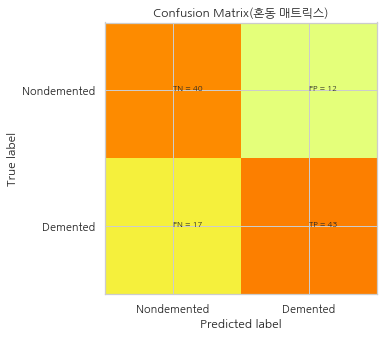

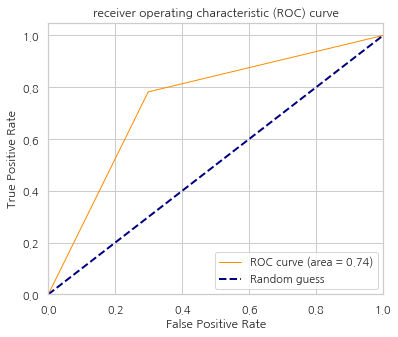


Accuracy Of the Model(GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)): 0.7410714285714286 


Confusion Matrix:
[[39 13]
 [22 38]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        52
           1       0.75      0.63      0.68        60

   micro avg       0.69      0.69      0.69       112
   macro avg       0.69      0.69      0.69    

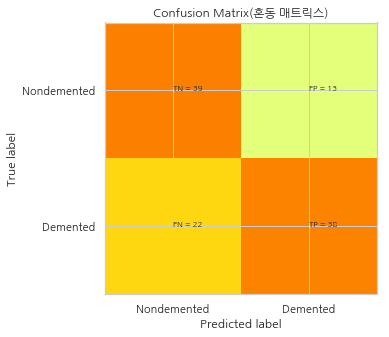

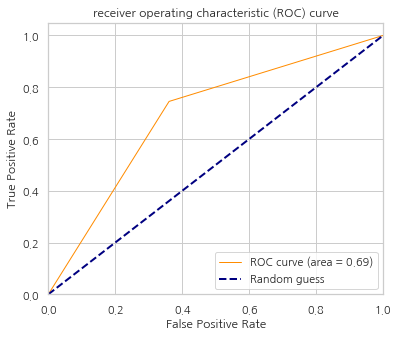


Accuracy Of the Model(GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [10, 20, 40, 60], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)): 0.6875 


Confusion Matrix:
[[44  8]
 [20 40]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        52
           1       0.83      0.67      0.74        60

   micro avg       0.75      0.75      0.75       112
   macro avg       0.76      0.76      0.75       112
weighted avg       0.77      0.75      0.75       112



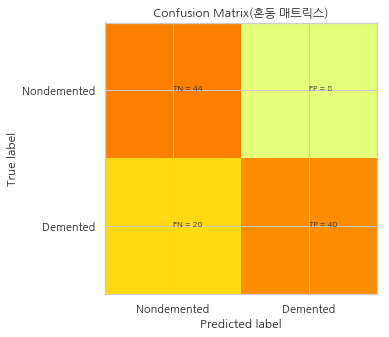

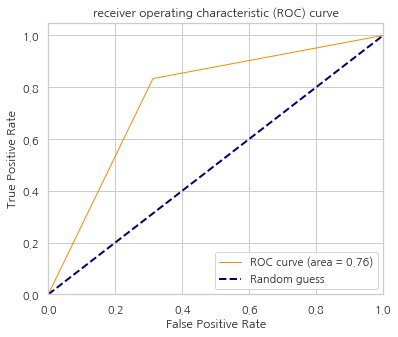


Accuracy Of the Model(GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)): 0.75 


Confusion Matrix:
[[46  6]
 [12 48]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        52
           1       0.89      0.80      0.84        60

   micro avg       0.84      0.84      0

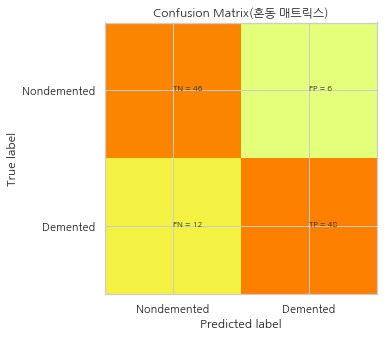

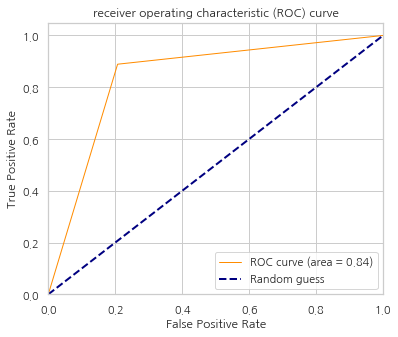


Accuracy Of the Model(GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 60, 70, 70, 90, 100], 'max_features': [4, 5, 6, 7], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)): 0.8392857142857143 


Confusion Matrix:
[[44  8]
 [12 48]]

Classification Report: 
              precision    recall  f1-score   support

         

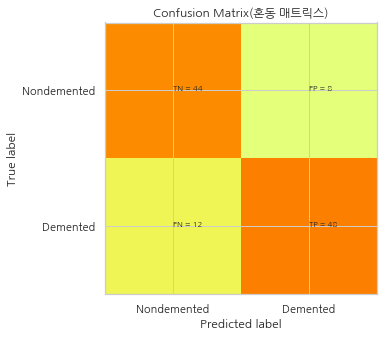

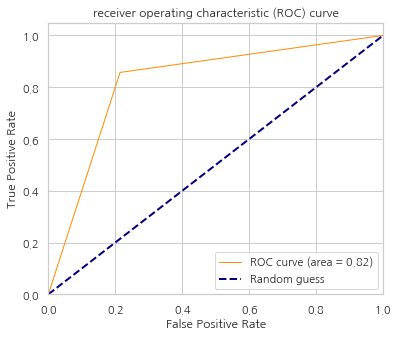


Accuracy Of the Model(GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5], 'n_estimators': [100, 200], 'learning_rate': [0.001, 0.01, 0.05], 'subsample': [0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)): 0.8214285714285714 


Confusion Matrix:
[[42 10]
 [19 41]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0

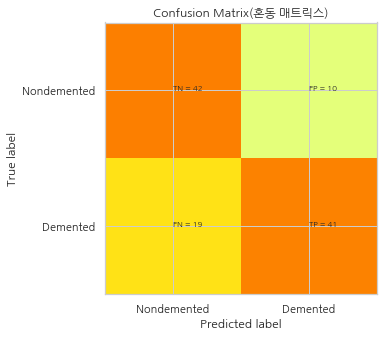

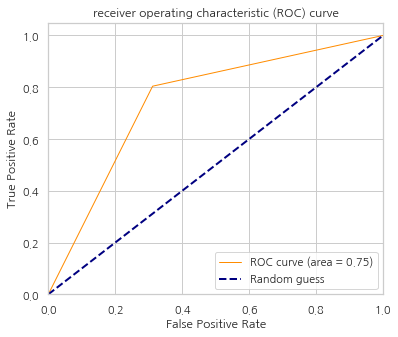


Accuracy Of the Model(GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)): 0.7410714285714286 


Confusion Matrix:
[[39 13]
 [16 44]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        52
           1       0.77      0.73      0.75        60

   micro avg       0.74      0.74      0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.74      0.7

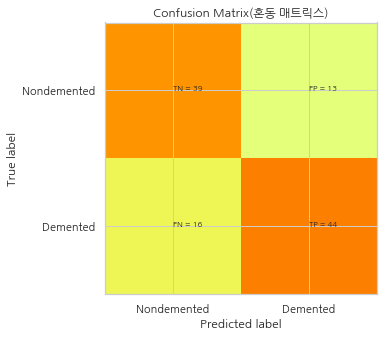

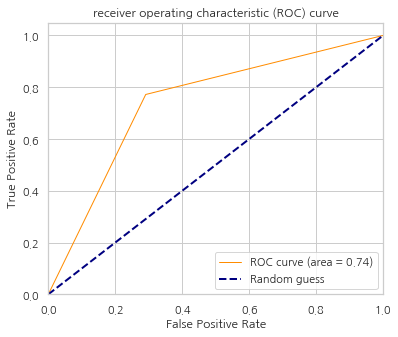


Accuracy Of the Model(GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'activation': ['logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(9,), (9, 9)], 'learning_rate_init': [0.005, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)): 0.7410714285714286 



In [82]:
for i in range(len(results)):
 #   y_test_pred = results[i].predict(X_test)
 #   print('\n===> Modeling : {} <==='.format(models[i][0]))
 #   print('<Confusion Matrix>')
 #   print(metrics.confusion_matrix(y_test, y_test_pred))
 #   print('<Classiffication Report')
 #   print(metrics.classification_report(y_test, y_test_pred))
    report_performance(results[i]) 
    roc_curves(results[i], True)
    report_accuracy(results[i], True)    

### 1-4. Modeling : Voting Classifier


Confusion Matrix:
[[45  7]
 [13 47]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        52
           1       0.87      0.78      0.82        60

   micro avg       0.82      0.82      0.82       112
   macro avg       0.82      0.82      0.82       112
weighted avg       0.83      0.82      0.82       112



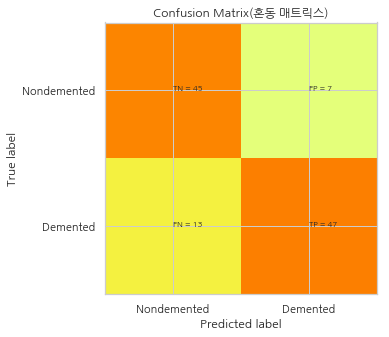

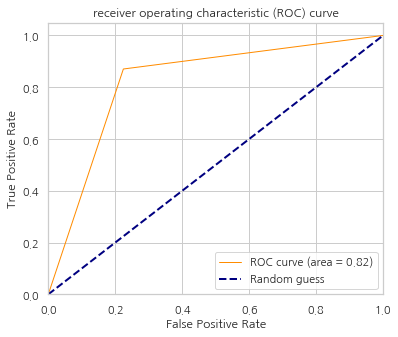


Accuracy Of the Model(VotingClassifier(estimators=[('etc', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)): 0.8214285714285714 


Confusion Matrix:
[[44  8]
 [10 50]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.86      0.83      0.85        60

   micro avg       0.84      0.84      0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



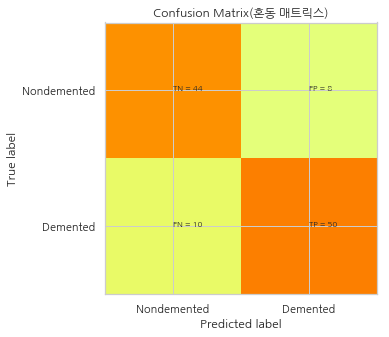

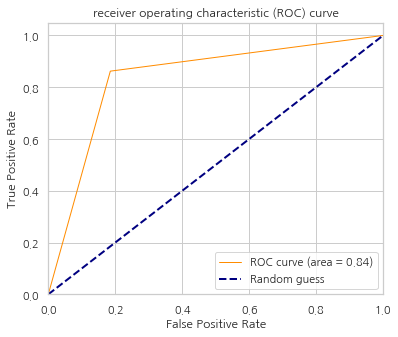


Accuracy Of the Model(VotingClassifier(estimators=[('etc', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)): 0.8392857142857143 



In [83]:
vote_est = [('etc',ensemble.ExtraTreesClassifier()),
            ('gb',GradientBoostingClassifier()),
            ('abc',AdaBoostClassifier()),
            ('rfc', ensemble.RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)),
            ('svc', svm.SVC(probability=True)),
            ('xgb', XGBClassifier())
#              ('lgbm',LGBMClassifier())
           ]

vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train.ravel())
vote_hard.fit(X_train, y_train.ravel())
report_performance(vote_hard) 
roc_curves(vote_hard)
report_accuracy(vote_hard)
#pred = vote_hard.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")

vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train.ravel())
vote_soft.fit(X_train, y_train.ravel())
report_performance(vote_soft) 
roc_curves(vote_soft)
report_accuracy(vote_soft)
#pred = vote_soft.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")

### 1-5. modeling : Other Classifiers

In [84]:
clfs =[ExtraTreesClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]

ExtraTreesClassifier : 

Confusion Matrix:
[[45  7]
 [12 48]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        52
           1       0.87      0.80      0.83        60

   micro avg       0.83      0.83      0.83       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.83      0.83      0.83       112



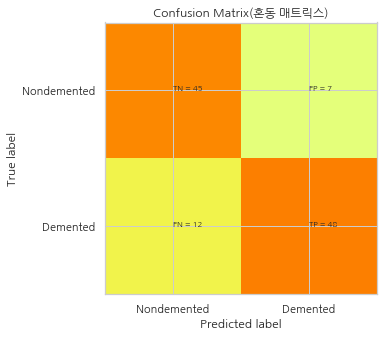

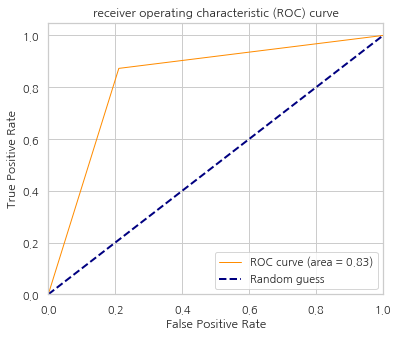


Accuracy Of the Model(ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)): 0.8303571428571429 

GradientBoostingClassifier : 

Confusion Matrix:
[[44  8]
 [11 49]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.86      0.82      0.84        60

   micro avg       0.83      0.83      0.83       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.83      0.83      0.83       112



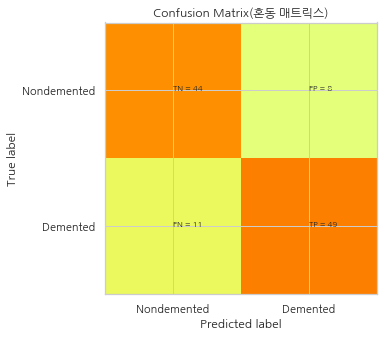

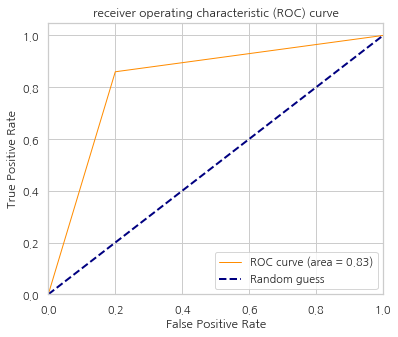


Accuracy Of the Model(GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)): 0.8303571428571429 

AdaBoostClassifier : 

Confusion Matrix:
[[40 12]
 [12 48]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        52
           1       0.80      0.80      0.80        60

   micro avg       0.79      0.79      0.79       112
   macro avg       0.78      0.78      0.78       112
weighted avg       0.79      0.79      0.79       11

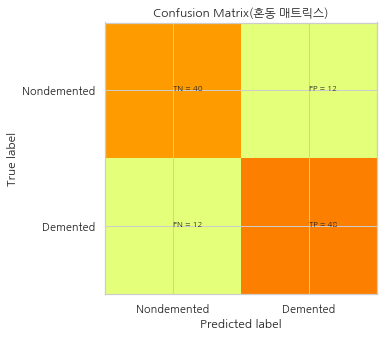

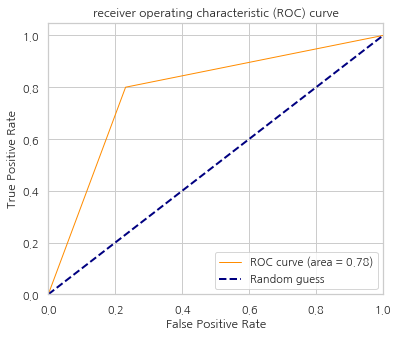


Accuracy Of the Model(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)): 0.7857142857142857 



In [85]:
for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_train,y_train.ravel())
    X = pd.DataFrame(X_train)
    report_performance(model)
    roc_curves(model)
    report_accuracy(model)

## Model Comparison

### 1. Accuracy : text

In [86]:
for key, value in total_accuracy.items():
    print("{} :{}".format(key, value))

LogisticRegression :0.7410714285714286
KNeighborsClassifier :0.6875
DecisionTreeClassifier :0.75
RandomForestClassifier :0.8392857142857143
XGBClassifier :0.8214285714285714
SVC :0.7410714285714286
MLPClassifier :0.7410714285714286
VotingClassifier :0.8392857142857143
ExtraTreesClassifier :0.8303571428571429
GradientBoostingClassifier :0.8303571428571429
AdaBoostClassifier :0.7857142857142857


In [87]:
sorted_total_accuracy= sorted(total_accuracy.items(), key=lambda x: x[1])
sorted_total_accuracy

[('KNeighborsClassifier', 0.6875),
 ('LogisticRegression', 0.7410714285714286),
 ('SVC', 0.7410714285714286),
 ('MLPClassifier', 0.7410714285714286),
 ('DecisionTreeClassifier', 0.75),
 ('AdaBoostClassifier', 0.7857142857142857),
 ('XGBClassifier', 0.8214285714285714),
 ('ExtraTreesClassifier', 0.8303571428571429),
 ('GradientBoostingClassifier', 0.8303571428571429),
 ('RandomForestClassifier', 0.8392857142857143),
 ('VotingClassifier', 0.8392857142857143)]

### 1. Accuracy : plot

Text(0,0.5,'Accuracy')

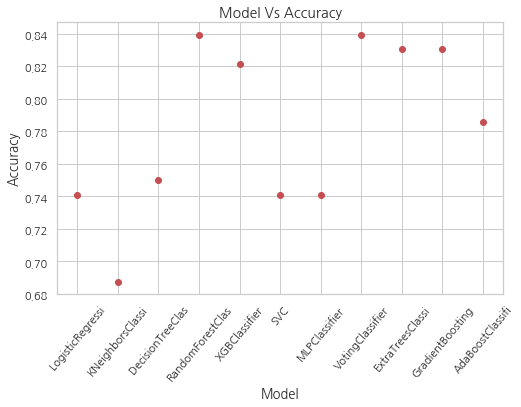

In [88]:
data = total_accuracy.values()
labels = total_accuracy.keys()

plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 14)
plt.xlabel('Model',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 13)

### 2. ROC

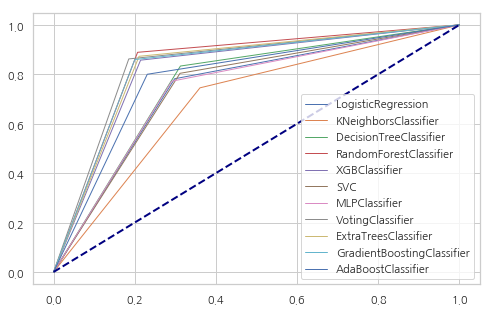

In [89]:
for i in total_fpr.keys():
    plt.plot(total_fpr[i],total_tpr[i],lw=1, label=i)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()

## @reference
- kaggle : https://www.kaggle.com/deepak525/dementia-classification-compare-classifiers
- 파이썬 수업 : 고태훈교수